# 8、ovr 和 ovo

什么是 ovr 和 ovo？

+ OVR 是 one vs rest，假设我们的 target 有三个类 A、B、C，我们拿到一个新样本，这个时候我们做的事情是：（1）判断是否是 A 类，（2）判断是否是 B 类，（3）判断是否是 C 类，一共计算三次，得到概率值最高的那个就将它判断成这个类。
+ OVO 是 one vs one，假设我们的 target 有三个类 A、B、C，我们拿到一个新样本，这个时候我们做的事情是：（1）判断是 A 类还是 B 类，（2）判断是 A 类还是 C 类，（3）判断是 B 类还是 C 类，得到的票数最多的类就将它判断成这个类。

小结：one vs one 的方式时间复杂度更高，但是更准确，因为，我们每次都是拿真实的两个类去训练，而不像 one vs rest 有一些瑕疵。

## 默认的情况下，LogisticRegression 中的 `multi_class='ovr'` 就是 one vs rest 的意思。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
# 为了可视化，我们暂时只取前两个特征
X = iris.data[:, :2]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
log_reg.score(X_test, y_test)

0.6578947368421053

可以看到，分类的效果并不好，这是因为我们只利用到了其中 2 个特征

In [5]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

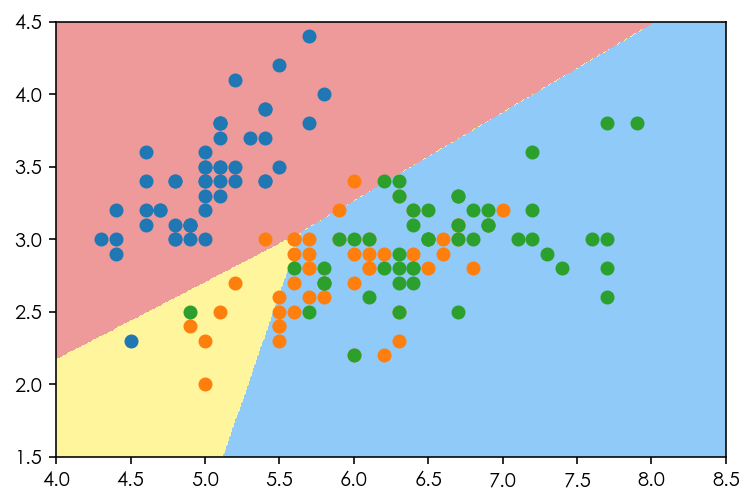

In [6]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

## 使用 LogisticRegression 的 ovo 

+ 设置 ovo 稍微复杂一点，如果使用 ovo 方式的多分类，原有的 `solver='liblinear'` 就失效了，还要传入一个新的参数 `solver`，例如： `multi_class="multinomial", solver="newton-cg"`。

In [7]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

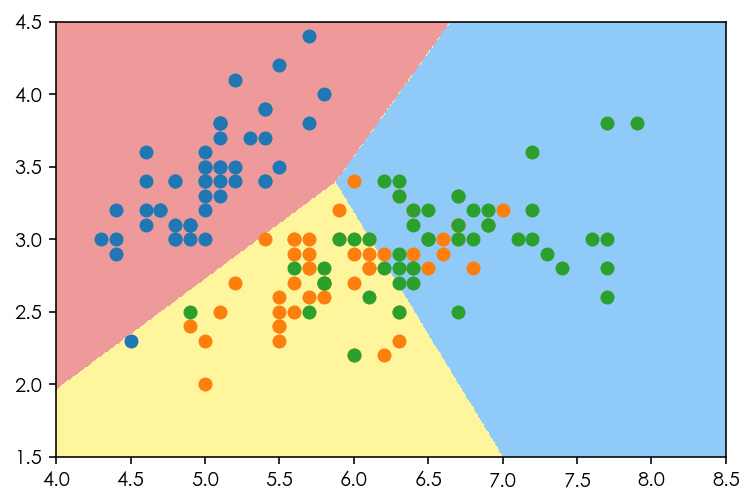

In [8]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

## 接下来，我们使用数据的所有特征完成训练，可以看到 ovo 的准确度要更高一些

### ovr

In [9]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9473684210526315

### ovo

In [11]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

分类完全正确

## 下面我们再介绍一下在 scikit-learn 中被封装好的 ovo 和 ovr 类。

### 在 OneVsRestClassifier 传入原来的 Logistic 类对象

In [12]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

### 在 OneVsOneClassifier 传入原来的 Logistic 类对象

In [13]:
from sklearn.multiclass import OneVsOneClassifier

# 此时，连参数都不用设置了
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0